In [15]:
import zipfile

# Path to the uploaded ZIP file
zip_path = r"C:\Users\saisr\Downloads\archive.zip"

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\saisr\Desktop\covid_data")  # Extract files into this directory

print("Extraction complete!")


Extraction complete!


In [28]:
import os

# List extracted files
files = os.listdir(r"C:\Users\saisr\Desktop\covid_data.csv")
print(files)


['country_wise_latest.csv', 'covid_19_clean_complete.csv', 'day_wise.csv', 'full_grouped.csv', 'usa_county_wise.csv', 'worldometer_data.csv']


In [32]:
import pandas as pd

# Specify the file path of the chosen CSV
file_path = (r"C:\Users\saisr\Desktop\covid_data.csv\covid_19_clean_complete.csv")

# Load the data into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [35]:
# Display column names and their data types
print(data.dtypes)

# Display the first few rows of the dataset to get an idea of the data
print(data.head())


Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0       

In [37]:
# Remove rows with missing values
data = data.dropna()

# Alternatively, you can fill missing values (e.g., with 0)
# data = data.fillna(0)

In [38]:
# Convert 'Date' column to datetime type (if it's not already)
data['Date'] = pd.to_datetime(data['Date'])

# Convert 'Confirmed' and 'Deaths' columns to numeric (if needed)
data['Confirmed'] = pd.to_numeric(data['Confirmed'], errors='coerce')
data['Deaths'] = pd.to_numeric(data['Deaths'], errors='coerce')


In [41]:
# Display column names to verify the correct one
print(data.columns)


Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [42]:
# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()


In [46]:
# Group by the 'Country/Region' column and sum the confirmed cases
total_cases_by_country = data.groupby('Country/Region')['Confirmed'].sum()

# Display the top 10 countries/regions with the most cases
print(total_cases_by_country.sort_values(ascending=False).head(10))


Country/Region
China             14132002
Canada             9356551
Australia           960247
France              534717
United Kingdom      156490
Denmark              23897
Netherlands          23007
Greenland             1507
Name: Confirmed, dtype: int64


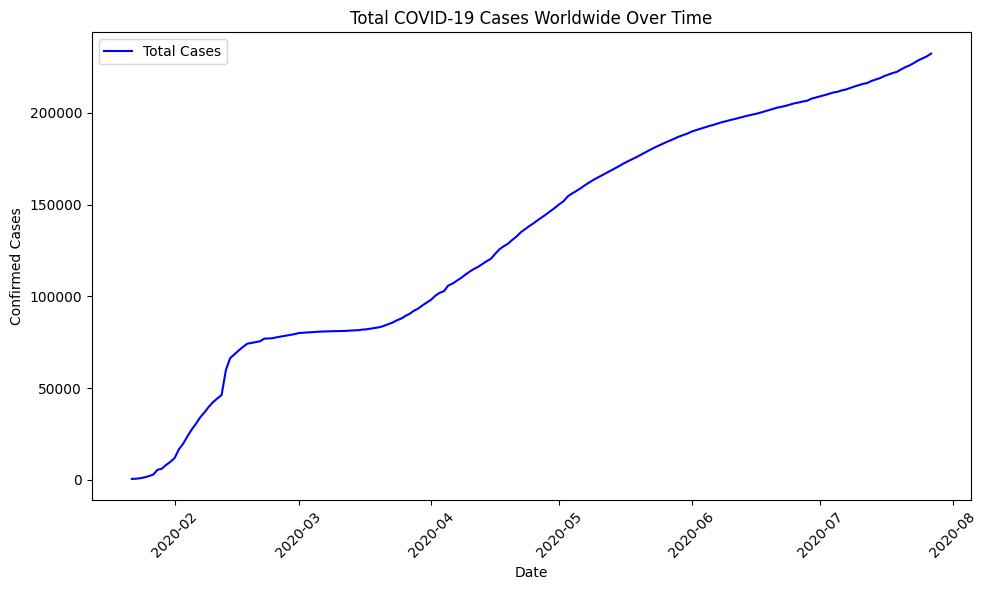

In [45]:
import matplotlib.pyplot as plt

# Group the data by Date and sum the confirmed cases
total_cases_over_time = data.groupby('Date')['Confirmed'].sum()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(total_cases_over_time.index, total_cases_over_time.values, color='blue', label='Total Cases')
plt.title('Total COVID-19 Cases Worldwide Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


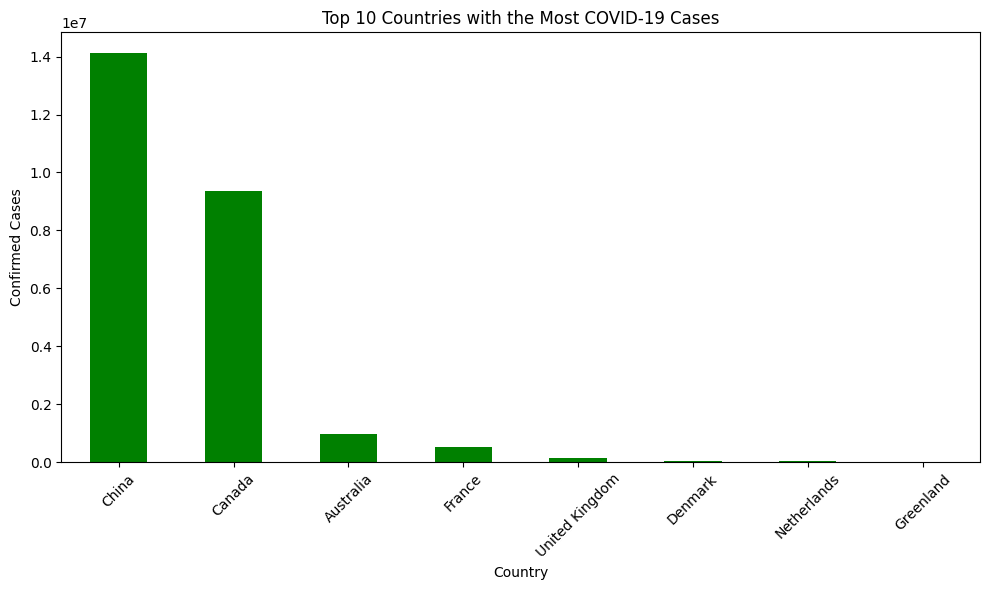

In [47]:
# Plot the bar chart for the top 10 countries
top_10_countries = total_cases_by_country.sort_values(ascending=False).head(10)
top_10_countries.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top 10 Countries with the Most COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Add a new column for the case fatality rate
data['CFR'] = (data['Deaths'] / data['Confirmed']) * 100

# Calculate the average CFR by country
average_cfr_by_country = data.groupby('Country/Region')['CFR'].mean()

# Display the countries with the highest CFR
print(average_cfr_by_country.sort_values(ascending=False).head(10))


Country/Region
Netherlands       8.265461
United Kingdom    4.604796
Canada            2.229486
France            2.016778
Australia         1.561857
China             1.046280
Denmark           0.000000
Greenland         0.000000
Name: CFR, dtype: float64


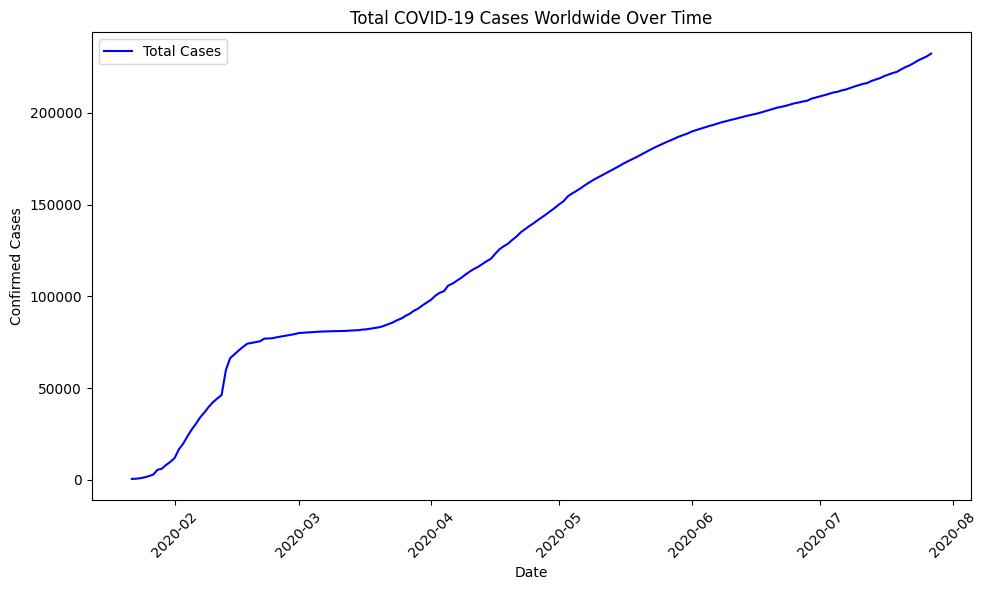

In [50]:
import matplotlib.pyplot as plt

# Group by 'Date' and sum the confirmed cases to get the global trend
total_cases_over_time = data.groupby('Date')['Confirmed'].sum()

# Plot the line chart for total cases over time
plt.figure(figsize=(10, 6))
plt.plot(total_cases_over_time.index, total_cases_over_time.values, color='blue', label='Total Cases')
plt.title('Total COVID-19 Cases Worldwide Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


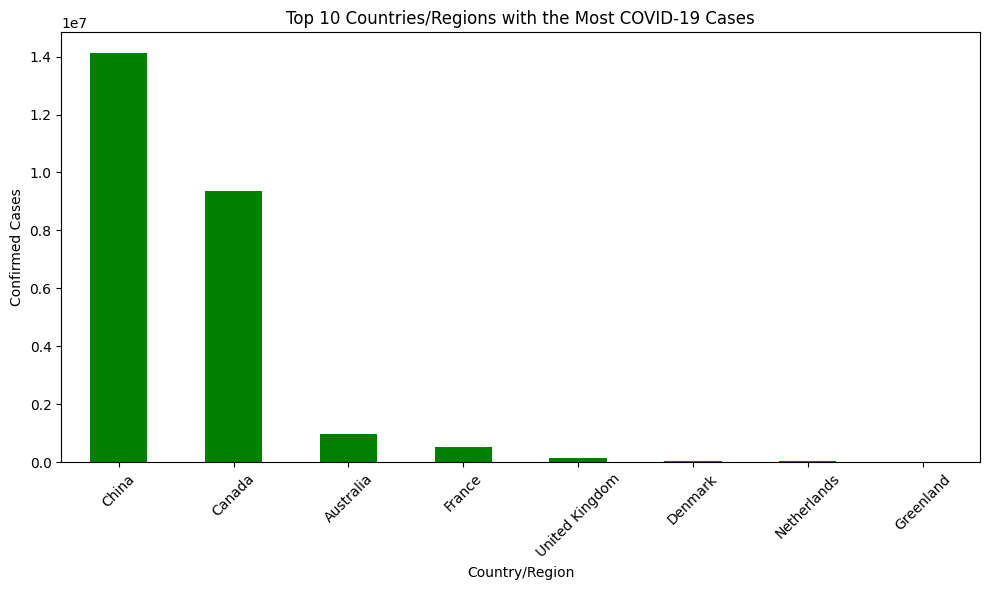

In [51]:
# Get the top 10 countries/regions with the most confirmed cases
top_10_countries = total_cases_by_country.sort_values(ascending=False).head(10)

# Plot the bar chart for the top 10 countries with the most cases
top_10_countries.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top 10 Countries/Regions with the Most COVID-19 Cases')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
# Group by 'Country/Region' and sum the deaths
total_deaths_by_country = data.groupby('Country/Region')['Deaths'].sum()

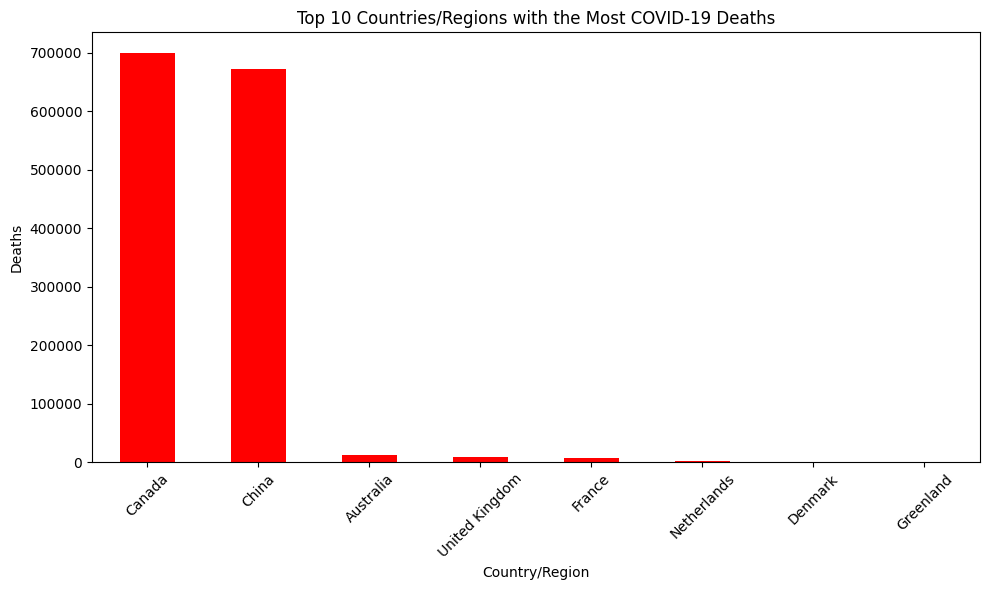

In [55]:
# Get the top 10 countries/regions with the most deaths
top_10_deaths = total_deaths_by_country.sort_values(ascending=False).head(10)

# Plot the bar chart for the top 10 countries with the most deaths
top_10_deaths.plot(kind='bar', color='red', figsize=(10, 6))
plt.title('Top 10 Countries/Regions with the Most COVID-19 Deaths')
plt.xlabel('Country/Region')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


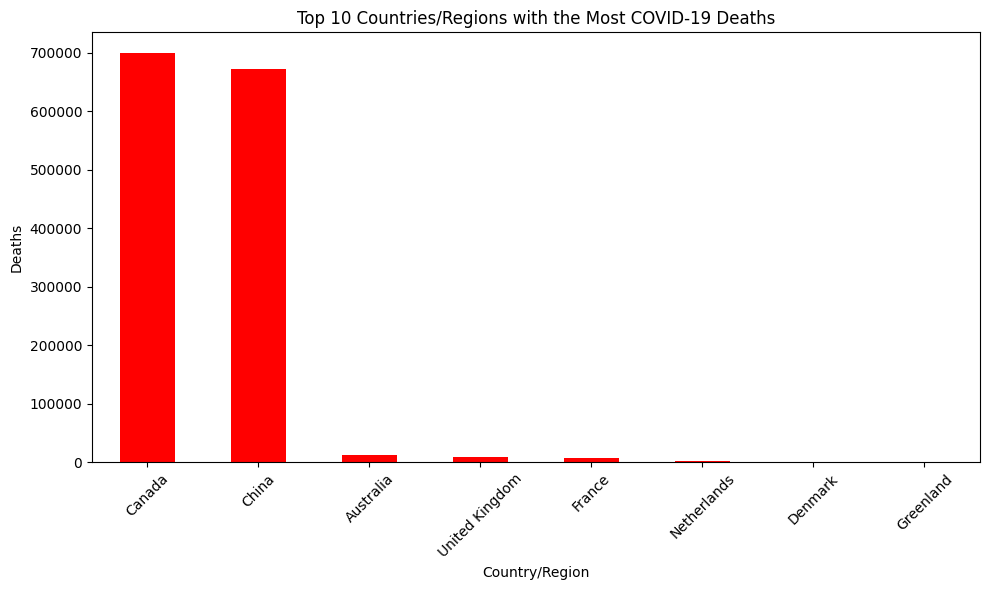

In [57]:
# Get the top 10 countries/regions with the most deaths
top_10_deaths = total_deaths_by_country.sort_values(ascending=False).head(10)

# Plot the bar chart for the top 10 countries with the most deaths
top_10_deaths.plot(kind='bar', color='red', figsize=(10, 6))
plt.title('Top 10 Countries/Regions with the Most COVID-19 Deaths')
plt.xlabel('Country/Region')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
# Add a new column for Case Fatality Rate (CFR)
data['CFR'] = (data['Deaths'] / data['Confirmed']) * 100

# Group by 'Country/Region' and calculate the average CFR
average_cfr_by_country = data.groupby('Country/Region')['CFR'].mean()

# Display the top 10 countries/regions with the highest CFR
print(average_cfr_by_country.sort_values(ascending=False).head(10))


Country/Region
Netherlands       8.265461
United Kingdom    4.604796
Canada            2.229486
France            2.016778
Australia         1.561857
China             1.046280
Denmark           0.000000
Greenland         0.000000
Name: CFR, dtype: float64


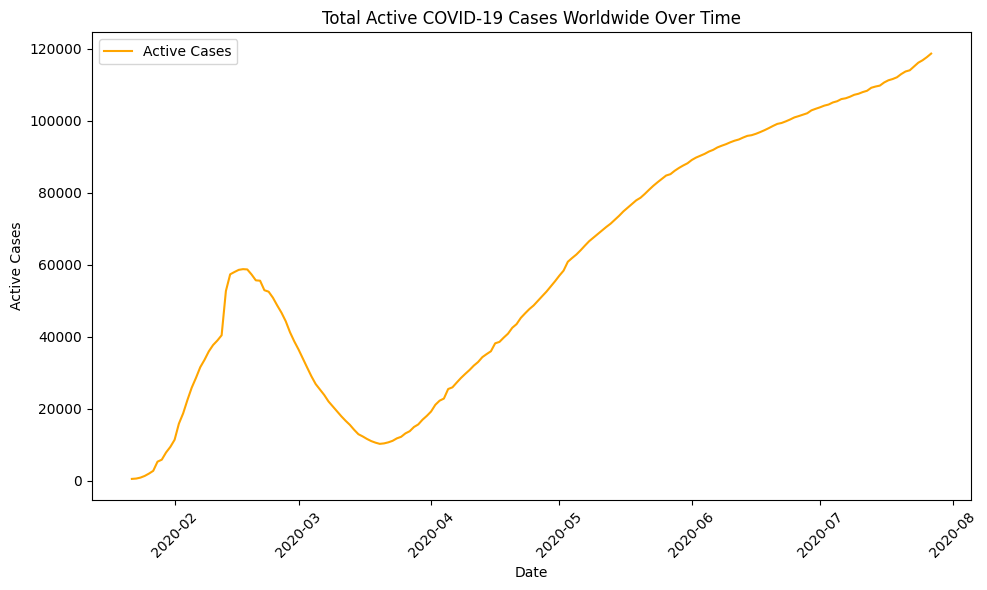

In [59]:
# Group by 'Date' and sum the active cases
active_cases_over_time = data.groupby('Date')['Active'].sum()

# Plot the line chart for active cases over time
plt.figure(figsize=(10, 6))
plt.plot(active_cases_over_time.index, active_cases_over_time.values, color='orange', label='Active Cases')
plt.title('Total Active COVID-19 Cases Worldwide Over Time')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
# Save the grouped data (e.g., total cases by country) to a CSV file
total_cases_by_country.to_csv('total_cases_by_country.csv')


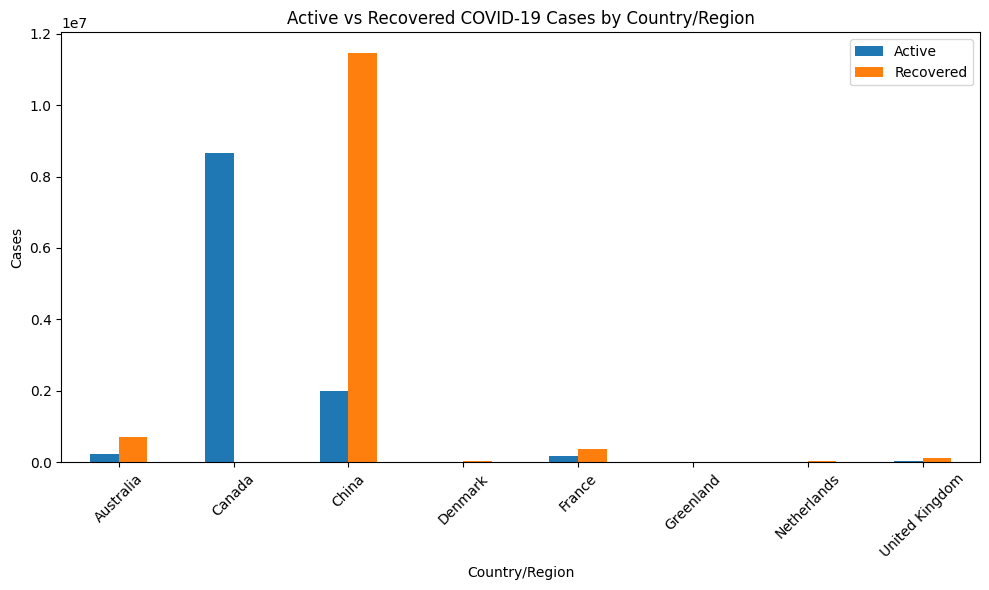

In [62]:
# Group by 'Country/Region' and sum the active and recovered cases
active_vs_recovered = data.groupby('Country/Region')[['Active', 'Recovered']].sum()

# Plot a bar chart for active and recovered cases
active_vs_recovered.plot(kind='bar', figsize=(10, 6))
plt.title('Active vs Recovered COVID-19 Cases by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


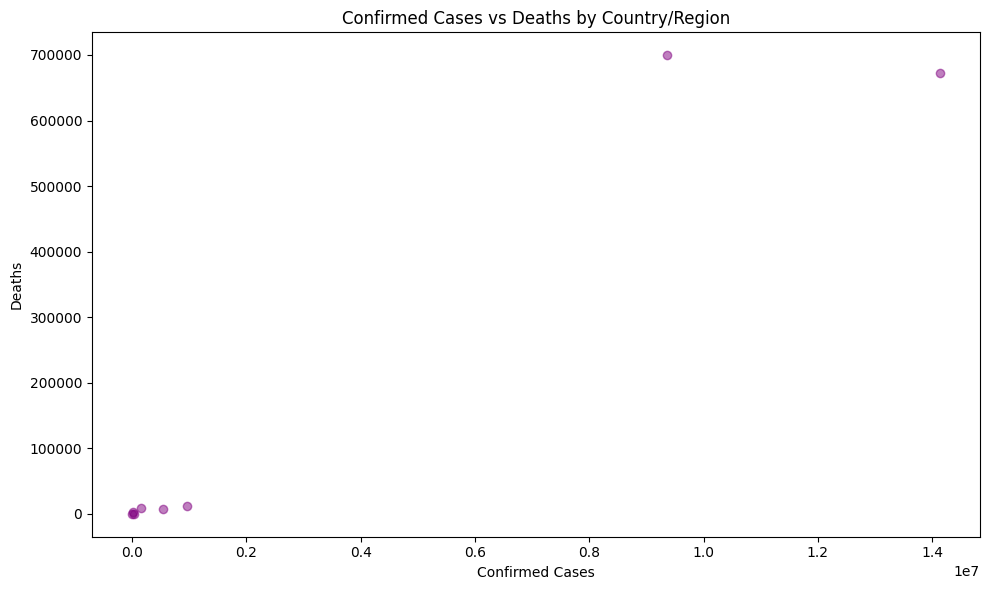

In [63]:
# Scatter plot of confirmed cases vs deaths
plt.figure(figsize=(10, 6))
plt.scatter(total_cases_by_country, total_deaths_by_country, color='purple', alpha=0.5)
plt.title('Confirmed Cases vs Deaths by Country/Region')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.tight_layout()
plt.show()


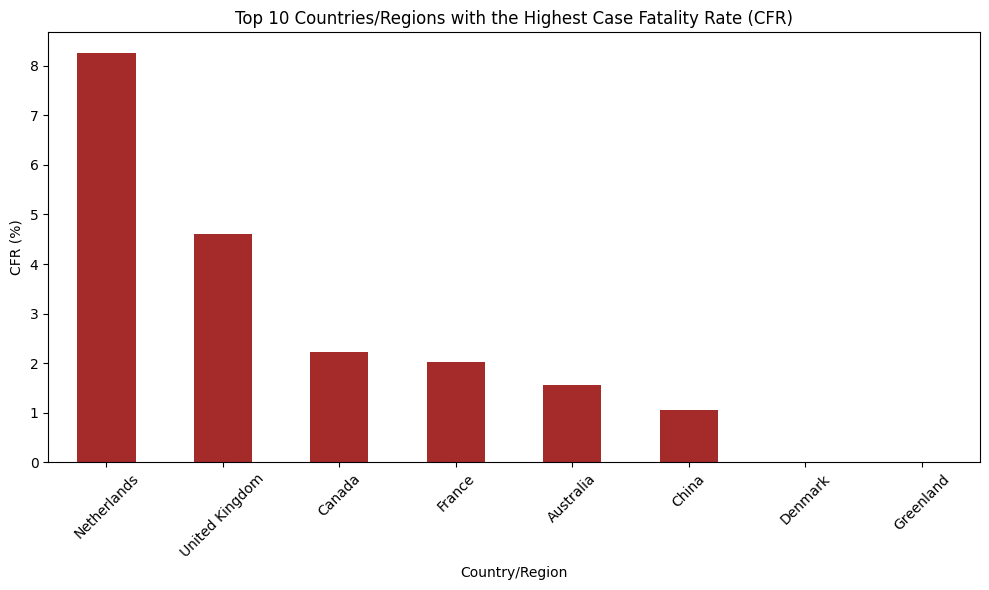

In [64]:
# Get the top 10 countries with the highest CFR
top_10_cfr = average_cfr_by_country.sort_values(ascending=False).head(10)

# Plot the bar chart for CFR
top_10_cfr.plot(kind='bar', color='brown', figsize=(10, 6))
plt.title('Top 10 Countries/Regions with the Highest Case Fatality Rate (CFR)')
plt.xlabel('Country/Region')
plt.ylabel('CFR (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


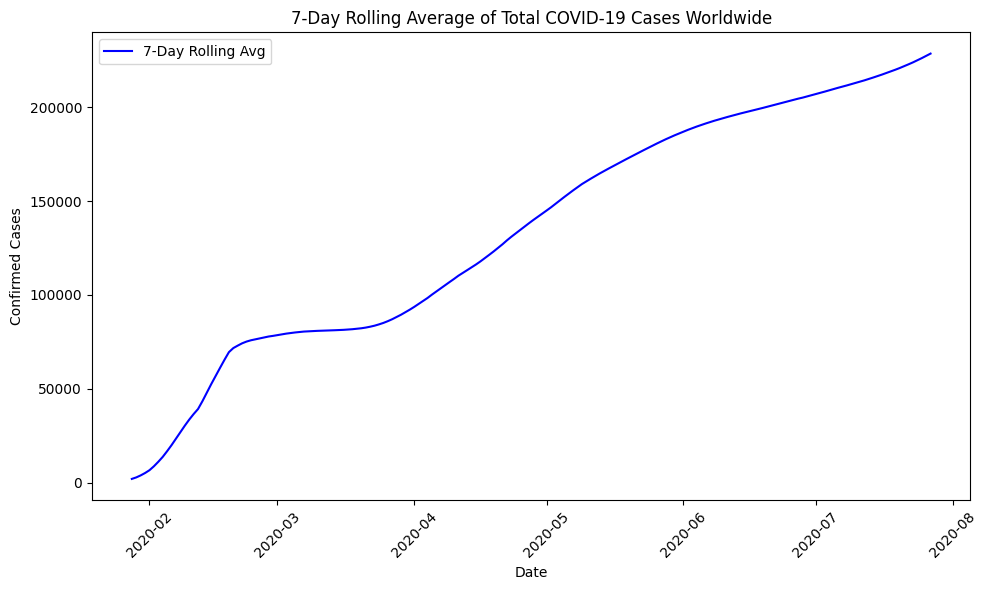

In [65]:
# Calculate 7-day rolling average for confirmed cases worldwide
rolling_average_cases = total_cases_over_time.rolling(window=7).mean()

# Plot the rolling average for confirmed cases
plt.figure(figsize=(10, 6))
plt.plot(rolling_average_cases.index, rolling_average_cases.values, color='blue', label='7-Day Rolling Avg')
plt.title('7-Day Rolling Average of Total COVID-19 Cases Worldwide')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [66]:
# Save the grouped data (e.g., total cases by country) to a CSV file
total_cases_by_country.to_csv('total_cases_by_country.csv')

# Save CFR data to a CSV file
average_cfr_by_country.to_csv('average_cfr_by_country.csv')

# You can also save other results or visualizations as needed


In [67]:
import os
os.getcwd()


'C:\\Users\\saisr'